In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Reading csv files

In [2]:
aisles = pd.read_csv('/home/gaurav/Documents/Python/data/instacart/aisles.csv')
departments = pd.read_csv('/home/gaurav/Documents/Python/data/instacart/departments.csv')
products = pd.read_csv('/home/gaurav/Documents/Python/data/instacart/products.csv')
orders = pd.read_csv('/home/gaurav/Documents/Python/data/instacart/orders.csv')
order_products_prior = pd.read_csv('/home/gaurav/Documents/Python/data/instacart/order_products_prior.csv')
order_products_train = pd.read_csv('/home/gaurav/Documents/Python/data/instacart/order_products_train.csv')
#sample_submission = pd.read_csv('/home/gaurav/Documents/Python/instacart/sample_submission.csv')

# 1. Data explanation, preparation and preprocessing
## Aisles

In [3]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [4]:
# Describing DataFrame > aisles with descriptive information:
aisles.describe()

,aisle_id
count,134.000000
mean,67.500000
std,38.826537
min,1.000000
25%,34.250000
50%,67.500000
75%,100.750000
max,134.000000


In [5]:
# Information of Structure of a DataFrame:
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [6]:
# Total rows & columns in DataFrame:
aisles.shape

(134, 2)

In [7]:
# To get number of unique in all columns:
aisles.nunique()

aisle_id    134
aisle       134
dtype: int64

In [8]:
# To get number of unique values in column 'aisle_id'
aisles.aisle_id.nunique(dropna = True)

134

In [9]:
# Total summation of all missing values of all columns in the DataFrame > aisles:
aisles.isnull().sum()

aisle_id    0
aisle       0
dtype: int64

In [10]:
# Total summation of all missing values in the DataFrame 
aisles.isnull().sum().sum()

0

In [11]:
# To check null value in DataFrame:
aisles[aisles.isnull().any(axis=1)]

,aisle_id,aisle


There are 134 unique Aisles in the data.

The dataset is have no null values.

## Departments

In [12]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [13]:
departments.shape

(21, 2)

In [14]:
departments.nunique()

department_id    21
department       21
dtype: int64

There are 21 unique Departments in the data.

The dataset is have no null values.

## Products

In [15]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [16]:
products.shape

(49688, 4)

In [17]:
products.nunique()

product_id       49688
product_name     49688
aisle_id           134
department_id       21
dtype: int64

In [18]:
# Finding duplicates on all columns
duplicate = products[products.duplicated()]
duplicate

,product_id,product_name,aisle_id,department_id


In [19]:
# Finding duplicates on selected columns:
# duplicate = products[products.duplicated('aisle_id')]
# duplicate = products[products['aisle_id'].duplicated()]
duplicate = products[products.aisle_id.duplicated()]
duplicate

,product_id,product_name,aisle_id,department_id
12,13,Saline Nasal Mist,11,11
19,20,Pomegranate Cranberry & Aloe Vera Enrich Drink,98,7
29,30,"Three Cheese Ziti, Marinara with Meatballs",38,1
33,34,Peanut Butter Cereal,121,14
35,36,Traditional Lasagna with Meat Sauce Savory Ita...,38,1
...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8


In [20]:
# Calculating duplicates on selected columns:
products.duplicated('aisle_id').sum()

49554

There are 49688 unique products.\
The dataset contains no null values.\
Each Department have number of aisles.\
Each Aisle have different products of same type.


## Orders

In [21]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [22]:
orders.shape

(3421083, 7)

In [23]:
orders.count()

order_id                  3421083
user_id                   3421083
eval_set                  3421083
order_number              3421083
order_dow                 3421083
order_hour_of_day         3421083
days_since_prior_order    3214874
dtype: int64

In [24]:
orders.nunique()

order_id                  3421083
user_id                    206209
eval_set                        3
order_number                  100
order_dow                       7
order_hour_of_day              24
days_since_prior_order         31
dtype: int64

In [25]:
orders.isnull().sum()

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

In [26]:
# To print the distinct (unique) values for a column:
print('Type of eval_set: {}'.format(orders.eval_set.unique()))

Type of eval_set: ['prior' 'train' 'test']


In [27]:
print('Number of users: {}'.format(orders.user_id.unique().shape[0]))

Number of users: 206209


In [28]:
print('Number of users in prior: {}'.format(orders[orders.eval_set=='prior'].user_id.unique().shape[0]))

Number of users in prior: 206209


In [29]:
print('Number of users in train: {}'.format(orders[orders.eval_set=='train'].user_id.unique().shape[0]))
#print('Number of users in train: {}'.format(orders[orders.eval_set=='train'].user_id.unique().shape[0]))

Number of users in train: 131209


In [30]:
print('Number of users in test: {}'.format(orders[orders.eval_set=='test'].user_id.unique().shape[0]))

Number of users in test: 75000


In [31]:
print('Number of null values: {}'.format(orders[orders.isnull().any(axis=1)].shape[0]))


Number of null values: 206209


Orders have information about orders placed by customers over time.\
There are around 206209 unique customers.\
For all the customers, days_since_prior_order is None for their first orders.

# 2. Exploratory Data Analysis
### 2.1. How many unique products each department have?

In [32]:
departments.head(2)

,department_id,department
0,1,frozen
1,2,other


In [33]:
products.head(2)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13


In [34]:
df = pd.merge(products, departments, on=['department_id'], how='left')
df.head(2)

,product_id,product_name,aisle_id,department_id,department
0,1,Chocolate Sandwich Cookies,61,19,snacks
1,2,All-Seasons Salt,104,13,pantry


In [35]:
# How many unique products each department have?

ans1 = df.groupby('department')['product_name'].count()
ans11 = ans1.sort_values(ascending=False)
ans11

department
personal care      6563
snacks             6264
pantry             5371
beverages          4365
frozen             4007
dairy eggs         3449
household          3085
canned goods       2092
dry goods pasta    1858
produce            1684
bakery             1516
deli               1322
missing            1258
international      1139
breakfast          1115
babies             1081
alcohol            1054
pets                972
meat seafood        907
other               548
bulk                 38
Name: product_name, dtype: int64

<AxesSubplot:xlabel='department'>

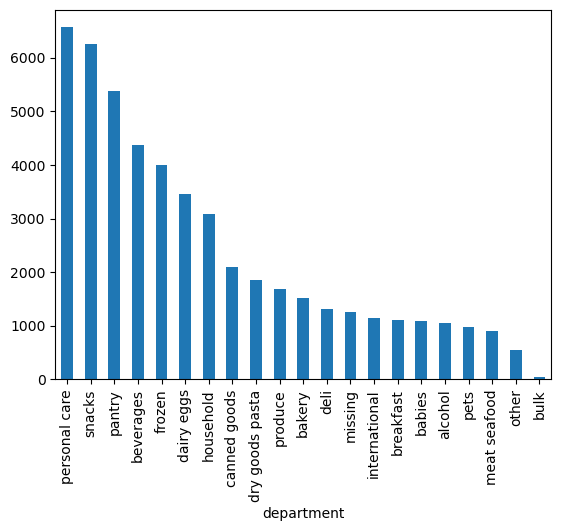

In [36]:
ans11.plot(x="department", kind="bar")


### 2.2. How many products ordered from each department?

In [37]:
ans2 = df.groupby(['department'])['product_id'].count()
ans2.sort_values(ascending=False)
ans2

department
alcohol            1054
babies             1081
bakery             1516
beverages          4365
breakfast          1115
bulk                 38
canned goods       2092
dairy eggs         3449
deli               1322
dry goods pasta    1858
frozen             4007
household          3085
international      1139
meat seafood        907
missing            1258
other               548
pantry             5371
personal care      6563
pets                972
produce            1684
snacks             6264
Name: product_id, dtype: int64